In [22]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx
import ipywidgets as widgets

from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
from IPython.display import HTML

In [2]:
cfg_plot = {
    'figure.figsize': (24, 24),
    'font.weight': 'normal',
    'font.size': 30,
    'lines.linewidth': 3,
    'lines.markersize': 20
}
plt.rcParams.update(cfg_plot)

In [60]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "black",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"
})
plt.style.use('dark_background')

In [61]:
def visualize(n: int, p: float, ax=None, pos=None):
    if 0 > p or p > 1:
        print(f"Can not have $p\notin(0,1)$")
        return
    graph = nx.erdos_renyi_graph(n, p)
    pos = nx.circular_layout(graph)
    #nx.draw_networkx_nodes(graph, pos, node_color="#223366", node_size=2000)
    #nx.draw_networkx_edges(graph, pos, edge_color="#000000", width=5)
    nx.draw_networkx_nodes(graph, pos, node_color="#ffffff", node_size=2000)
    nx.draw_networkx_edges(graph, pos, edge_color="#ffffff", width=5)
    nx.draw(graph, pos=pos, ax=ax)
    #nx.draw(graph, pos)

In [69]:
n_frames = 200

In [70]:
p_per_frame = {frame: round(frame/n_frames, 2) for frame in range(n_frames)}

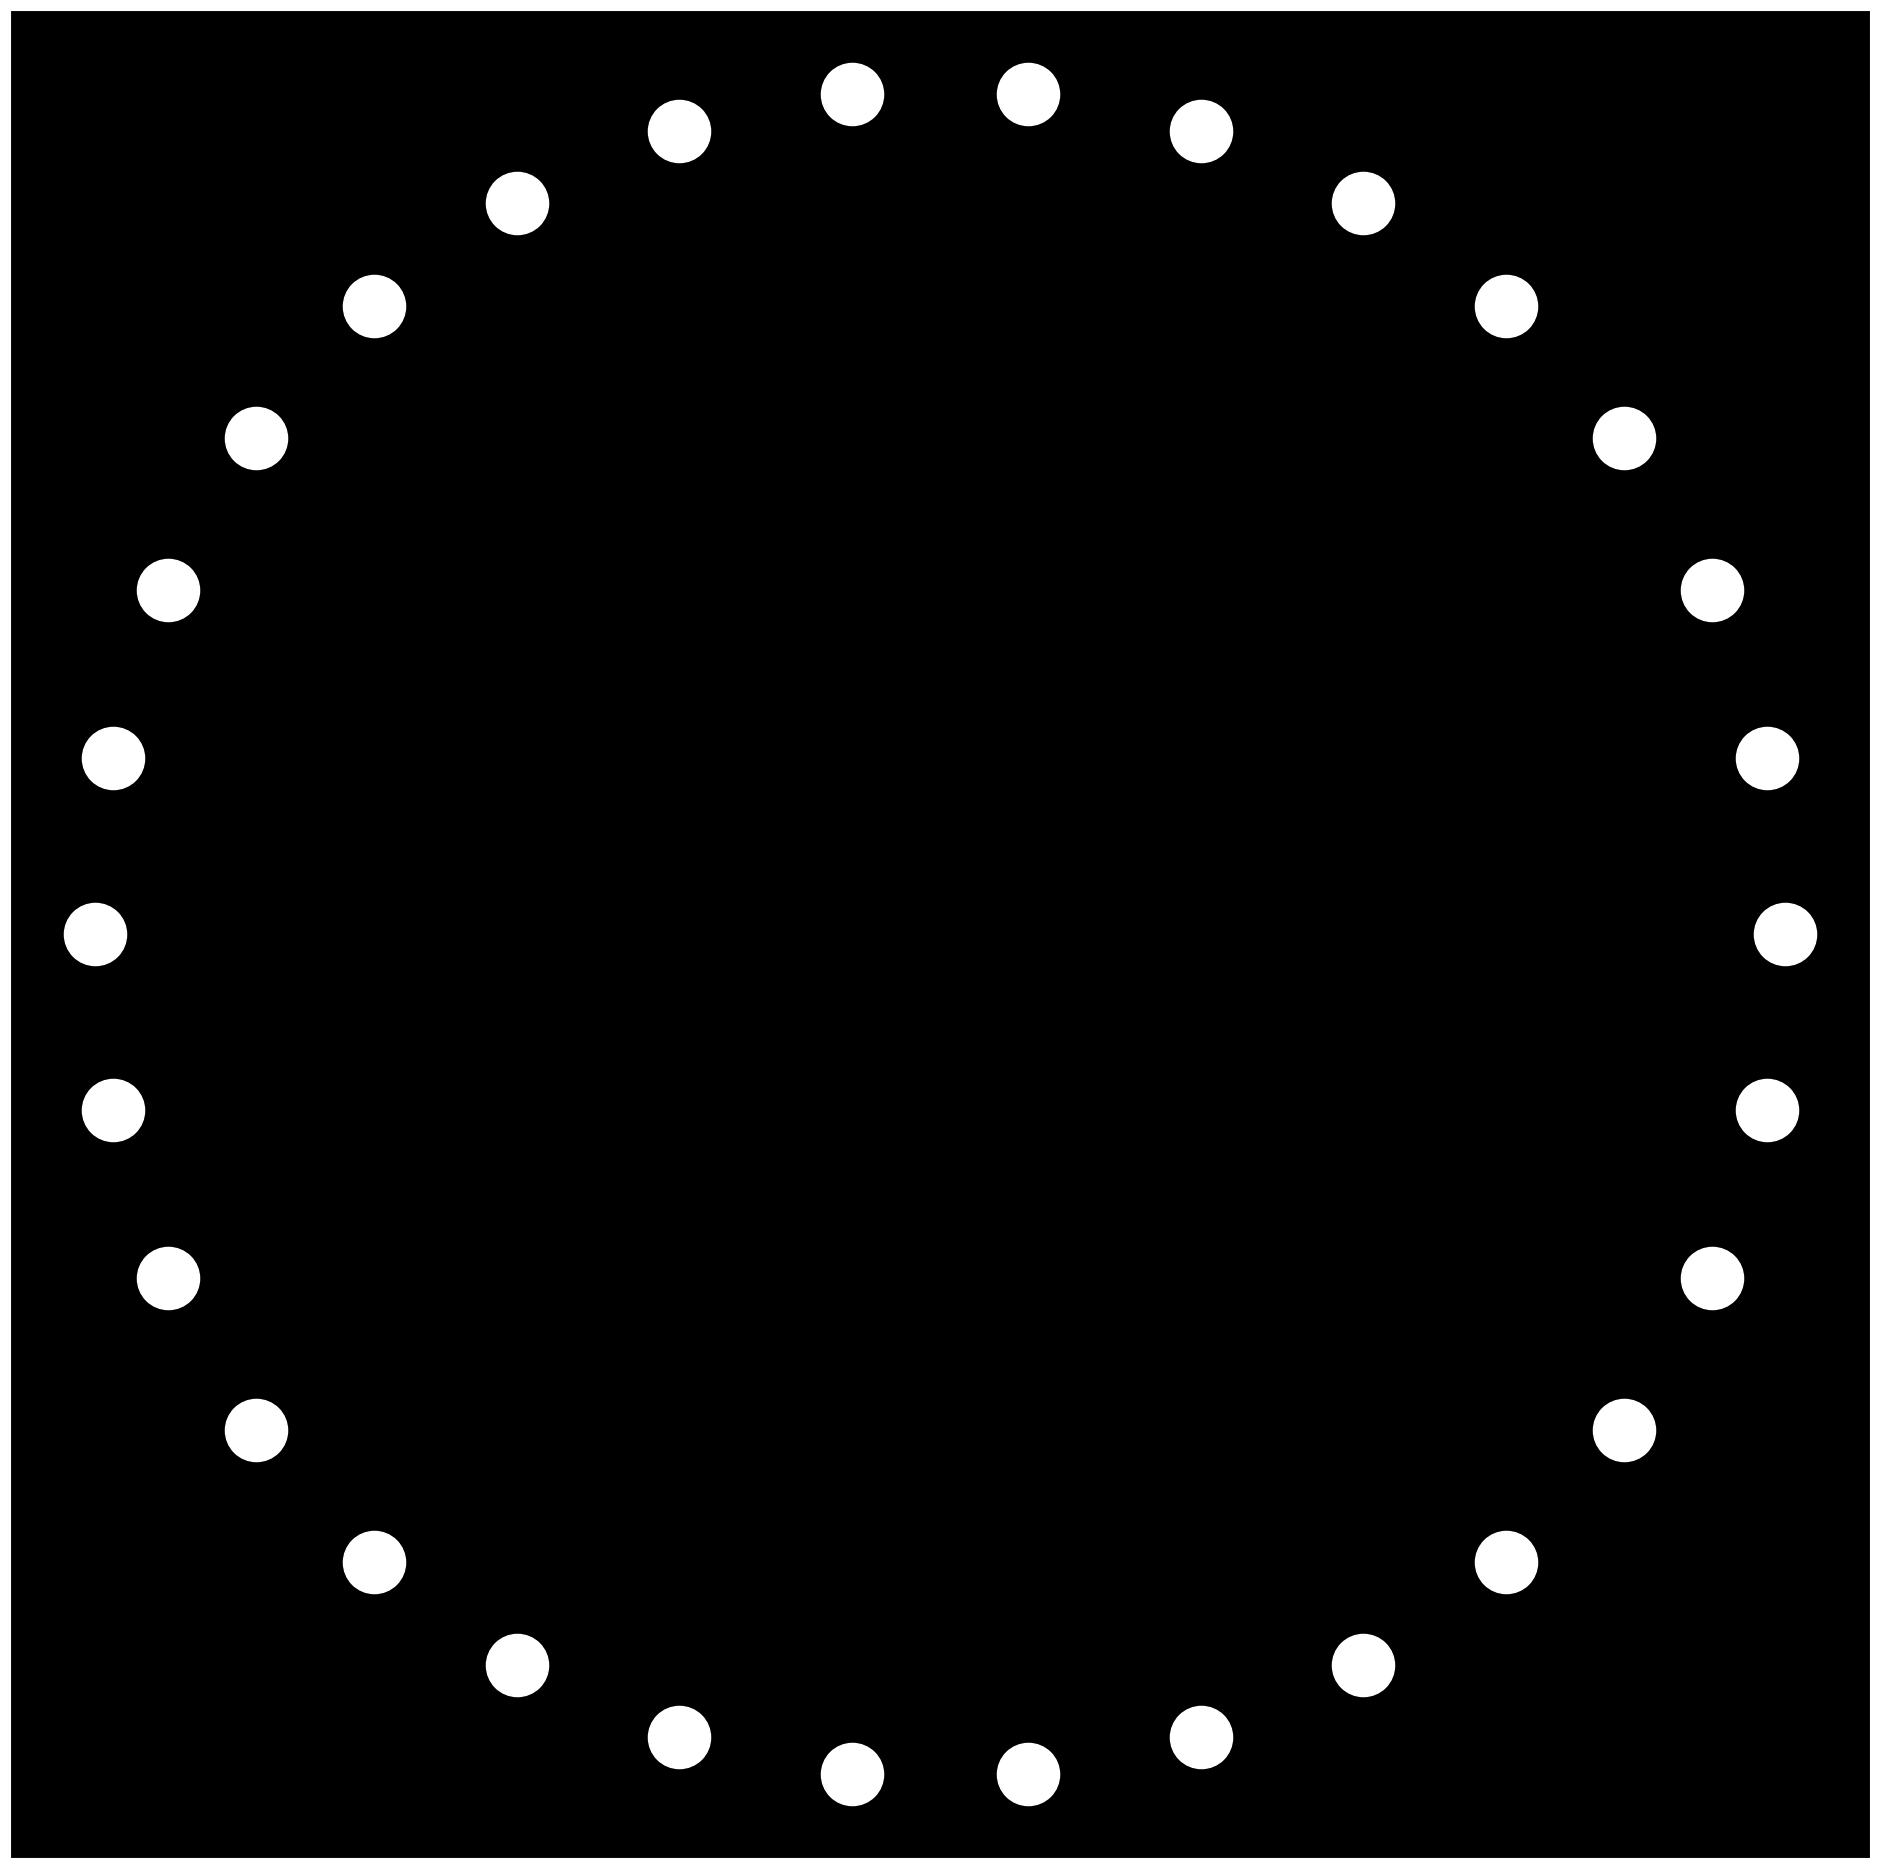

In [72]:
n_vertices = 20

fig, ax = plt.subplots()
graph = nx.Graph()
graph = nx.erdos_renyi_graph(n_vertices, 0.8)
pos = nx.circular_layout(graph)
nx.draw(graph, pos=pos, ax=ax)
plt.clf()

def update(frame):
    #print(frame, p_per_frame[frame])
    fig.clf()
    visualize(n=30, p=p_per_frame[frame], ax=ax, pos=pos)
    #return (fig, ax)
    return frame

ani = animation.FuncAnimation(fig=fig, func=update, frames=n_frames, interval=500)
#plt.show()
#HTML(ani.to_jshtml())
ani.save("erdosrenyi.mp4")